# Preprocessing and Modelling

In this notebook, I scale the data and explore oversampling and undersampling techniques to balance the classes, all these prior to modelling. Subsequently, run data across classification algorithms - Logistic Regression, Random Forest Classifier, Support Vector Classifier and XGBoost Classifier.

**Contents:**
- [Imports](#Import-Libraries)
- [Preprocessing](#Preprocessing)
  - [Model Preparation](#Model-Prep)
  - [Scaling Data](#Scaling-Data)
  - [Balance Classes](#Balance-Classes)
- [Model Selection](#Model-Selection)
- [Model Evaluation](#Model-Evaluation)
- [Summary](#Summary)
- [Learning Points](#Learning-Points)
- [Further Improvements](#Further-Improvements)
- [References](#References)

### Import Libraries

In [1]:
#imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')
#visualisation
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from prettytable import PrettyTable
# preprocessing
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import ADASYN
# modelling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

print("All imported successfully!")
%matplotlib inline

All imported successfully!


In [2]:
# read clean data
cc = pd.read_csv("../data/cc_clean.csv")
print("=================== Top 5 rows of dataset ===================")
display(cc.head())
print("=================== Shape of dataset ===================")
print(cc.shape)
print("=================== Data types in dataset ===================")
print(cc.dtypes)
print("=================== Description of data in dataset ===================")
display(cc.describe())

=================== Top 5 rows of dataset ===================


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


=================== Shape of dataset ===================
(283726, 30)
=================== Data types in dataset ===================
v1        float64
v2        float64
v3        float64
v4        float64
v5        float64
v6        float64
v7        float64
v8        float64
v9        float64
v10       float64
v11       float64
v12       float64
v13       float64
v14       float64
v15       float64
v16       float64
v17       float64
v18       float64
v19       float64
v20       float64
v21       float64
v22       float64
v23       float64
v24       float64
v25       float64
v26       float64
v27       float64
v28       float64
amount    float64
class       int64
dtype: object
=================== Description of data in dataset ===================


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


### Preprocessing

### Model Prep
Split data into training set and test set, prior to any scaling or transformations.

In [3]:
# create features and target variable
features = [col for col in cc.columns if col != 'class']
X = cc[features]
y = cc['class']

In [4]:
# split using default test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

### Scaling Data
There are several ways to scale the data usking sklearn's methods. 

1. StandardScaler
2. MinMaxScaler
3. RobustScaler

Based on [this article](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02), `MinMaxScaler` bounds the data, preserves the shape of the original distribution and doesn't reduce the importance of outliers. `RobustScaler` reduces effects of outliers relative to `MinMaxScaler`. `StandardScaler` if there is a need for a relatively normal distribution.

Since I have already removed outliers and do not need to bound the data to a specific range, I will use `StandardScaler`.

### Balance Classes
The most basic approach to balance classes is random oversampling/undersampling, which randomly duplicates/deletes examples in the minority/majority class, respectively. 

For this project, I would not consider undersampling as it would mean working on mere hundreds of data when I have hundred thousands of data available.

Oversampling techniques from sklearn's imbalanced-learn library :

1. Random Oversampling 
2. Synthetic Minority Oversampling Technique (SMOTE) 
3. Adaptive Synthetic Sampling Method (ADASYN) 

Rather than just randomly duplicating minority samples, `SMOTE` synthesizes elements of the minority class, in the vicinity or already existing elements (ie. uses k-nearest-neighbours to create similar but randomly tweaked new observations). From [this article](https://www.datasciencecentral.com/profiles/blogs/handling-imbalanced-data-sets-in-supervised-learning-using-family), `ADASYN` uses a weighted distribution for different minority class samples to decide the number of synthetic samples. This compensates for any skewed distributions. Whereas for `SMOTE`, it generates the same number of synthetic samples for each original minority sample. 

`ADASYN` appear to be more robust, so I will apply this oversampling technique.

In [5]:
# apply ADASYN
adasyn = ADASYN(sampling_strategy='minority')
counter_before = Counter(y_train)
print("Count before ADASYN: ", counter_before)
#fit and resample with ADASYN
X_train_ada, y_train_ada = adasyn.fit_resample(X_train,y_train)
counter_after = Counter(y_train_ada)
print("Count after ADASYN: ", counter_after)

Count before ADASYN:  Counter({0: 212439, 1: 355})
Count after ADASYN:  Counter({0: 212439, 1: 212418})


Now the classes are pretty balanced, so I move forward with modelling.

### Model Selection
Use a pipeline to scale data, balance classes and run the models.

In [6]:
# instantiate classifiers
logreg = LogisticRegression()
rfc = RandomForestClassifier()
svc = SVC()
xgbc = XGBClassifier()

In [7]:
# build pipeline
p1 = Pipeline([('ss', StandardScaler()),
              ('logreg', logreg)])
p2 = Pipeline([('ss', StandardScaler()),
              ('rfc', rfc)])
p3 = Pipeline([('ss', StandardScaler()),
              ('svc', svc)])
p4 = Pipeline([('ss', StandardScaler()),
              ('xgbc', xgbc)])

In [8]:
# params
params1 = [{'logreg__solver': ['newton-cg','liblinear'],
           'logreg__penalty': ['none', 'l1', 'l2', 'elasticnet'],
           'logreg__C': [10, 1.0, 0.1, 0.001]}]
params2 = [{'rfc__n_estimators': [100, 250, 500], 
           'rfc__max_depth': [10,20],
           'rfc__min_samples_split': [5,10,20]}]
params3 = [{'svc__C': [1], 
           'svc__kernel': ['linear']}] 
params4 = [{'xgbc__n_estimators': [50, 100, 250, 500],
           'xgbc__max_depth': [3,5,10],
           'xgbc__learning_rate': [0.05,0.1,0.3]}]

In [9]:
# set up gridsearch for each algo
gridcvs = {}

inner_cv = KFold(n_splits=2, shuffle=True, random_state=42)

for paramgrid, estimator, name in zip((params1,params2,params3,params4),
                                     (p1,p2,p3,p4),
                                     ('Logistic Regression','Random Forest Classifier', 'Support Vector Classifier', 'XGBoost Classifier')):
    gcv = GridSearchCV(estimator = estimator,
                      param_grid = paramgrid,
                      scoring = 'roc_auc',
                      n_jobs=-1,
                      cv=inner_cv,
                      verbose=0,
                      refit=True)
    gridcvs[name]=gcv

In [10]:
%%time
# score on algos
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
  
a = PrettyTable(title="Cross-validated ROC-AUC score", header_style='title', max_table_width=110)
a.field_names =["Algorithms", "ROC-AUC score", "Standard Deviation"]
for name, gs_est in sorted(gridcvs.items()):
    nested_score = cross_val_score(gs_est,
                                  X=X_train_ada,
                                  y=y_train_ada,
                                  cv=outer_cv,
                                  scoring='roc_auc')
    a.add_row([name, f'{round(nested_score.mean(),3)*100}%', f'+/- {round(nested_score.std(),3)*100}%'])
    print(f'Done with {name}')
#print table
print(a)

Done with Logistic Regression
Done with Random Forest Classifier
Done with Support Vector Classifier
[01:36:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:59:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:22:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd lik

It seems that `Random Forest Classifier` and `XGBoost Classifier` were the best performing with perfect classification. As both did equally well, I decided to move forward with `Random Forest Classifier` as it takes lesser computing power, compared to `XGBoost Classifier`. 

### Model Evaluation
In considering the metrics to evaluate the model, I first look at the prediction error (Type 1 or Type 2 error)

<u>Type 1 error</u>

Type 1 error is the false positive rate (FPR) which is the fraction of false alerts based on model predictions. This is when the model classifies a transaction as fraudulent when it actually is not. 

Considering the implications of a Type 1 error, the bank would have to cancel credit cards, which means administrative costs. Customers may be dissatisfied knowing thier cards have been cancelled when the card was not tampered with anyway. This may affect the credibility of the bank. 

<u>Type 2 error</u>

Type 2 error is the false negative rate (FNR) which is the fraction of missed detection based on model predictions. This is when the model classifies a fraudulent transaction as genuine.

Misclassifying a fraudulent transaction is more dire as there could be much more losses incurred if say the fraudulent transactions continue unnoticed. Not only that, the bank's reputation and credibility would be hurt. Once the amount is lost, it would be very hard to recover. 

While recall (percentage of actual positives a model correctly identified) is more important than precision (percentage of true positives among all positives that the model identified), we can't completely ignore precision. Due to this, I choose to evaluate the model using the <u>AUC score</u> from ROC-AUC curve. The curve visualises the trade-off between the TPR and FPR and the better the model, the closer the AUC score is to 1. 

In [11]:
# fitting a model to the whole training set using the "best" algorithm - cluster 1
best_algo = gridcvs['Random Forest Classifier']

best_algo.fit(X_train_ada, y_train_ada)
train_auc = roc_auc_score(y_true=y_train_ada, y_score=best_algo.predict_proba(X_train_ada)[:,1])
test_auc = roc_auc_score(y_true=y_test, y_score=best_algo.predict_proba(X_test)[:,1])

b = PrettyTable(title="Random Forest Classifier Scores")
b.field_names = [" ", "ROC-AUC Score"]
b.add_row(["Average score over CV folds", round(100*best_algo.best_score_,3)])
b.add_row(["Training ROC-AUC Score", round(100*train_auc,3)])
b.add_row(["Test ROC-AUC Score", round(100*test_auc,3)])
print(b)

print("=============== Best Params ===============")
print(gridcvs['Random Forest Classifier'].best_params_)

+---------------------------------------------+
|       Random Forest Classifier Scores       |
+-----------------------------+---------------+
|                             | ROC-AUC Score |
+-----------------------------+---------------+
| Average score over CV folds |     100.0     |
|    Training ROC-AUC Score   |     100.0     |
|      Test ROC-AUC Score     |     98.286    |
+-----------------------------+---------------+
=============== Best Params ===============
{'rfc__max_depth': 20, 'rfc__min_samples_split': 10, 'rfc__n_estimators': 250}


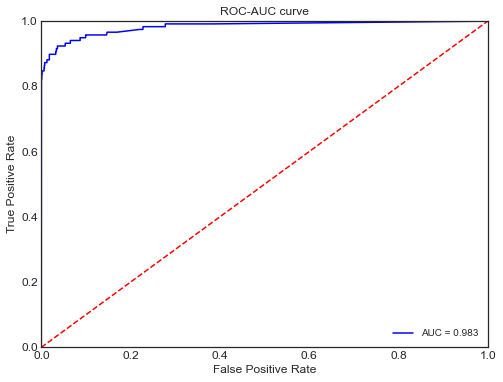

In [12]:
# plot ROC-AUC curve
preds = best_algo.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = round(auc(fpr,tpr),3)

plt.figure(figsize = (8,6))
plt.title("ROC-AUC curve", fontsize=12)
plt.plot(fpr,tpr, 'b', label = f'AUC = {roc_auc}')
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.show()

Running model predictions on the test data, `Random Forest Classifier` achieved an auc score of 98.3%. This means that the model was able to predict correctly 98.3% of the time. 

### Summary

From credit card transactions data with imbalanced fraudulent and genuine transaction classes, I used ADASYN to balance the classes and ran four classification algorithms to build a model, that was able to achieve 98.1% accurate classification of fraudulent transactions. 

### Learning Points
* Balanced classes with oversampling or undersampling. To consider oversampling techniques first, because undersampling is a "waste" of data collected already.
* Oversampling : ROS, SMOTE, ADASYN
* If classes remain unbalanced, can consider using other scoring metrics.
* Evaluation metrics for classification metric. ROC-AUC seem all encompassing. 

### Further Improvements
* A lot of processing power is needed to run several models along with tuning hyperparameters. Is there a more efficient way to select between models?

### References

Hyperparameter tuning for logistic regression:
https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

Hyperparameter tuning for SVC:
https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769

Classification evaluation metrics: https://www.analyticsvidhya.com/blog/2020/10/how-to-choose-evaluation-metrics-for-classification-model/